<a href="https://www.kaggle.com/code/sagarkanade721/store-sales-prediction-various-regression-models?scriptVersionId=101708655" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/stores-area-and-sales-data/Stores.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import copy

In [3]:
df_master=pd.read_csv("../input/stores-area-and-sales-data/Stores.csv")

In [4]:
df=copy.copy(df_master)

In [5]:
df.head()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [7]:
df.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [8]:
df.columns

Index(['Store ID ', 'Store_Area', 'Items_Available', 'Daily_Customer_Count',
       'Store_Sales'],
      dtype='object')

In [9]:
#Lets drop Store ID column as it is not going to help us in prediction or in analysis
df=df.drop('Store ID ', axis=1)

In [10]:
df.head()

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620


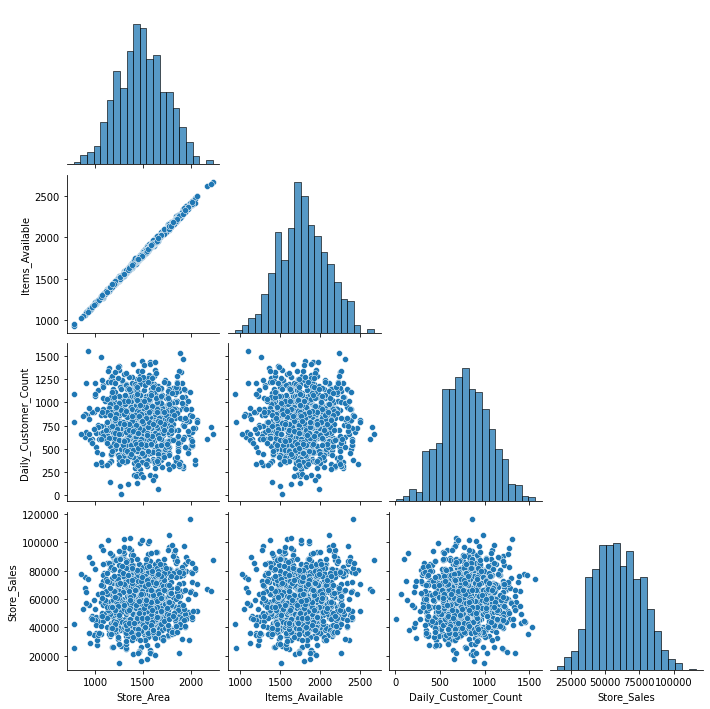

In [11]:
sns.pairplot(df,corner=True)

<AxesSubplot:>

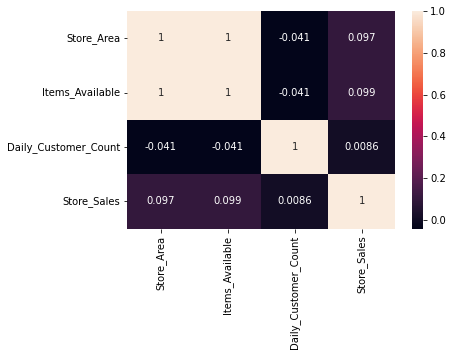

In [12]:
sns.heatmap(df.corr(),annot=True)

In [13]:
df.corr()['Store_Sales']

Store_Area              0.097474
Items_Available         0.098849
Daily_Customer_Count    0.008629
Store_Sales             1.000000
Name: Store_Sales, dtype: float64

<AxesSubplot:>

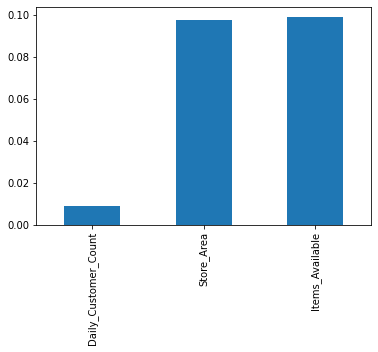

In [14]:
df.corr()['Store_Sales'].sort_values()[:-1].plot(kind='bar')

In [15]:
#lets seperate dependent and independent variables
X=df.drop('Store_Sales',axis=1)
y=df['Store_Sales']

In [16]:
X.head()

,Store_Area,Items_Available,Daily_Customer_Count
0,1659,1961,530
1,1461,1752,210
2,1340,1609,720
3,1451,1748,620
4,1770,2111,450


In [17]:
y.head()

0    66490
1    39820
2    54010
3    53730
4    46620
Name: Store_Sales, dtype: int64

In [18]:
#Lets split data for training and testing
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [20]:
#lets scale data
from sklearn.preprocessing import StandardScaler

In [21]:
scaler=StandardScaler()

In [22]:
X_train=scaler.fit_transform(X_train)

In [23]:
X_test=scaler.transform(X_test)

# **Linear Regression**

In [24]:
#lets create Regression model:

from sklearn.linear_model import LinearRegression

In [25]:
linear_regression=LinearRegression()

In [26]:
linear_regression.fit(X_train,y_train)

LinearRegression()

In [27]:
y_pred=linear_regression.predict(X_test)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [29]:
mean_absolute_error(y_test,y_pred)

14142.343784102932

In [30]:
np.sqrt(mean_squared_error(y_test,y_pred))

17151.30677512929

In [31]:
df['Store_Sales'].describe()

count       896.000000
mean      59351.305804
std       17190.741895
min       14920.000000
25%       46530.000000
50%       58605.000000
75%       71872.500000
max      116320.000000
Name: Store_Sales, dtype: float64

# **Polynomial Regression**

In [32]:
X=df.drop('Store_Sales',axis=1)
y=df['Store_Sales']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [34]:
scaler=StandardScaler()

In [35]:
X_train=scaler.fit_transform(X_train)

In [36]:
X_test=scaler.transform(X_test)

In [37]:
from sklearn.preprocessing import PolynomialFeatures

In [38]:
poly_converter=PolynomialFeatures(degree=2,include_bias=False)

In [39]:
poly_features=poly_converter.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)

In [41]:
poly_model=LinearRegression()

In [42]:
poly_model.fit(X_train,y_train)

LinearRegression()

In [43]:
y_pred=poly_model.predict(X_test)

In [44]:
mean_absolute_error(y_test,y_pred)

14234.982827998734

In [45]:
np.sqrt(mean_squared_error(y_test,y_pred))

17276.50363457191

In [46]:
#No significant difference in result compared to Linear Regression,
#lets try increasing degree of polynomial

In [47]:
MAE_TRAINS=[]
MAE_TESTS=[]

for d in range(1,10):
    
    poly_converter=PolynomialFeatures(degree=d,include_bias=False)
    poly_features=poly_converter.fit_transform(X)
    
    X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.20, random_state=101)
    
    poly_model=LinearRegression()
    poly_model.fit(X_train,y_train)
    
    train_preds=poly_model.predict(X_train)
    test_preds=poly_model.predict(X_test)
    
    mae_train=mean_absolute_error(y_train,train_preds)
    mae_test=mean_absolute_error(y_test,test_preds)
    
    MAE_TRAINS.append(mae_train)
    MAE_TESTS.append(mae_test)
    
    

In [48]:
MAE_TESTS

[14142.343784102932,
 14234.982827998734,
 14378.96158744018,
 14820.177576604328,
 15320.547086116501,
 17950.8085812942,
 18905.013159237653,
 19341.8875,
 24127.291894535312]

In [49]:
MAE_TRAINS

[14043.362469901871,
 14008.75254020193,
 13913.556457468901,
 13830.945906087927,
 13702.545289167054,
 14038.371838234074,
 13670.864771220253,
 13216.45504143366,
 14120.954661215796]

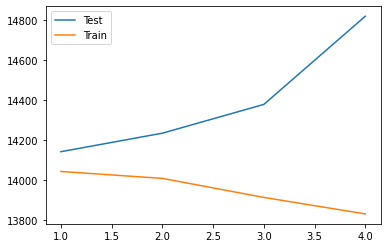

In [50]:
plt.plot(range(1,5),MAE_TESTS[:4],label='Test')
plt.plot(range(1,5),MAE_TRAINS[:4],label='Train')

plt.legend()

In [51]:
#There is no significant change in results even at high degree of polynomial

# **ElasticNet**

In [52]:
X=df.drop('Store_Sales',axis=1)
y=df['Store_Sales']

In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [54]:
X_train=scaler.fit_transform(X_train)

In [55]:
X_test=scaler.transform(X_test)

In [56]:
from sklearn.linear_model import ElasticNet

In [57]:
elastic_model=ElasticNet(max_iter=100000,tol=0.01)

In [58]:
#help(ElasticNet)

In [59]:
#Lets find best hyperparameters using GridSearchCV

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
param_grid={'alpha':[0.0001,0.001,0.1,0.5,1,10,50,75,100,150,200,500],'l1_ratio':[0.01,0.1,0.2,0.3,0.5,0.7,0.8,0.9,0.99,1]}

In [62]:
grid_model=GridSearchCV(elastic_model,param_grid=param_grid)

In [63]:
grid_model.fit(X_train,y_train)

GridSearchCV(estimator=ElasticNet(max_iter=100000, tol=0.01),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 0.5, 1, 10, 50, 75, 100,
                                   150, 200, 500],
                         'l1_ratio': [0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.8, 0.9,
                                      0.99, 1]})

In [64]:
grid_model.best_estimator_.get_params()

{'alpha': 10,
 'copy_X': True,
 'fit_intercept': True,
 'l1_ratio': 0.5,
 'max_iter': 100000,
 'normalize': 'deprecated',
 'positive': False,
 'precompute': False,
 'random_state': None,
 'selection': 'cyclic',
 'tol': 0.01,
 'warm_start': False}

In [65]:
y_pred=grid_model.predict(X_test)

In [66]:
mean_absolute_error(y_test,y_pred)

14315.599410858207

In [67]:
np.sqrt(mean_squared_error(y_test,y_pred))

17159.924231614394

# **Support Vector Machine**

In [68]:
X=df.drop('Store_Sales',axis=1)
y=df['Store_Sales']

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101)

In [70]:
X_train=scaler.fit_transform(X_train)

In [71]:
X_test=scaler.transform(X_test)

In [72]:
from sklearn.svm import SVR

In [73]:
#help(SVR)

In [74]:
svr=SVR()

In [75]:
param_grid={'kernel':['linear','poly','rbf'],
            'gamma':['scale','auto'],
            'degree':[2,3,4],
            'C':[0.001,0.1,1,1.5],
            'epsilon':[0.001,0.1,1,2,5]}

In [76]:
grid_model=GridSearchCV(svr,param_grid=param_grid,cv=5)

In [77]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=SVR(),
             param_grid={'C': [0.001, 0.1, 1, 1.5], 'degree': [2, 3, 4],
                         'epsilon': [0.001, 0.1, 1, 2, 5],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf']})

In [78]:
grid_model.best_estimator_.get_params()

{'C': 1.5,
 'cache_size': 200,
 'coef0': 0.0,
 'degree': 3,
 'epsilon': 5,
 'gamma': 'scale',
 'kernel': 'poly',
 'max_iter': -1,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [79]:
y_pred=grid_model.predict(X_test)

In [80]:
mean_absolute_error(y_test,y_pred)

14324.814034065956

In [81]:
np.sqrt(mean_squared_error(y_test,y_pred))

17182.34088484207